***READING AND DISPLAYING IMAGE***

In [104]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [105]:
def show(img):
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.imshow(img, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.show()

In [106]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
    plt.title(title_2)
    plt.show()

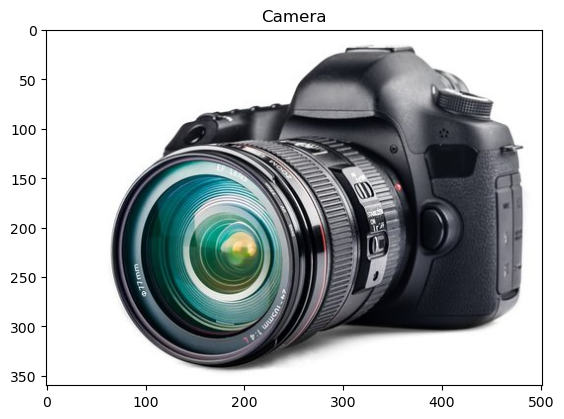

In [107]:
img = cv2.imread('camera.jpg')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('on') #if we write plt.axis('off') the axis will disappear.
plt.title("Camera")
plt.show()

In [108]:
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [109]:
print("Type of image is {}".format(type(img)))

Type of image is <class 'numpy.ndarray'>


In [110]:
print(len(img))

360


In [111]:
print("Dimension for image is {}".format(img.shape))

Dimension for image is (360, 502, 3)


In [112]:
img.max()

255

In [113]:
img.min()

0

Here 0 is complete black and 255 is bright white.

In [114]:
length = img.shape[0]
width = img.shape[1]
channels = img.shape[2]

print("Length of image is {}".format(length))
print("Width of image is {}".format(width))
print("Number of channels is {}".format(channels))


Length of image is 360
Width of image is 502
Number of channels is 3


In [115]:
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    

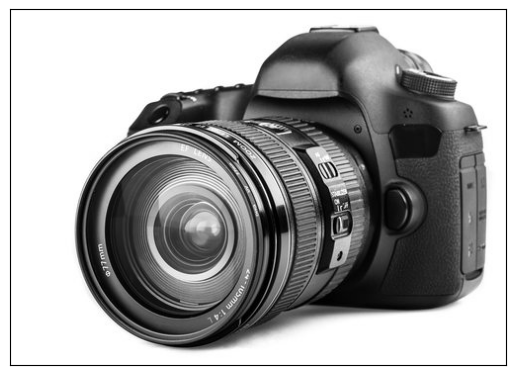

In [116]:
image_gray=get_grayscale(img)
show(image_gray)

In [117]:
img.shape

(360, 502, 3)

INDEXING:-

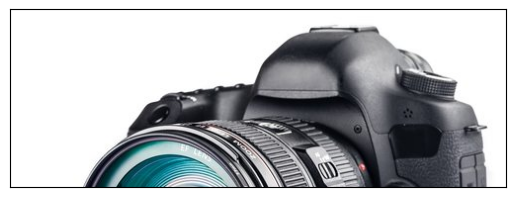

In [118]:
rows = 180 #total 4000 rows were there
show(img[0:rows, :, :])

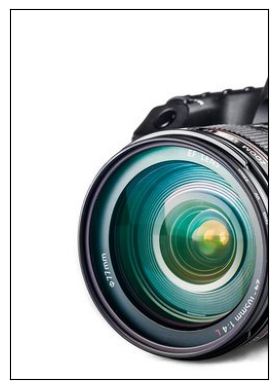

In [119]:
columns = 251
show(img[:,0:columns,:])

In [120]:
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [121]:
image_r=rgb_image.copy()
image_g=rgb_image.copy()
image_b=rgb_image.copy()
image_b[:, :, :2]=0
image_r[:, :, 1:]=0
image_g[:, :, [0, 2]]=0


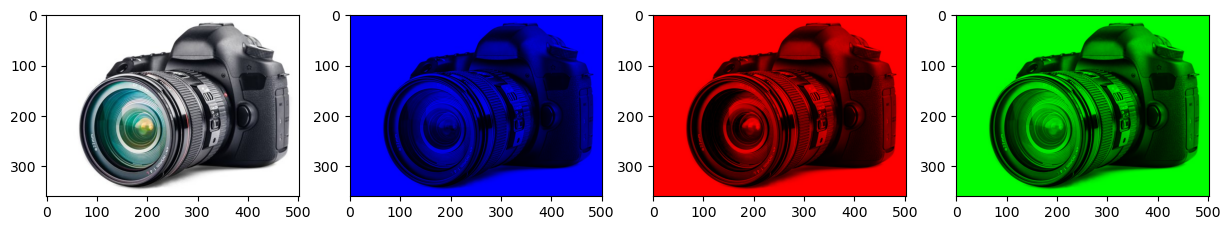

In [122]:
f, axes = plt.subplots(1, 4, figsize = (15,15))
images= [img, image_b, image_r, image_g]

i = 0
for ax in axes:
    if i==0:
        ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        
    else:
        ax.imshow(images[i])
    i+=1

MANUPULATING IMAGES:-

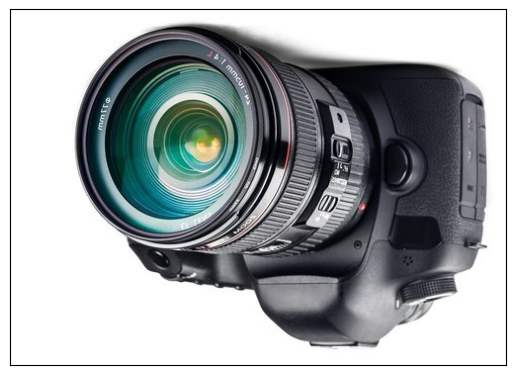

In [123]:
#flipping images

width, height,C=img.shape
array_flip = np.zeros((width, height,C),dtype=np.uint8)
for i,row in enumerate(img):
        array_flip[width-1-i,:,:]=row

show(array_flip)

We can also use rotate function to flip images

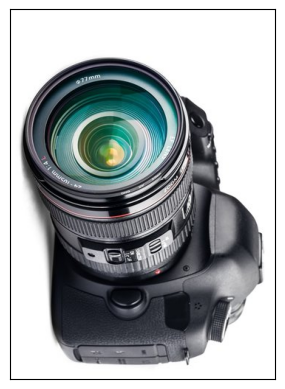

In [124]:
im_flip = cv2.rotate(img, 0)
show(im_flip)

In [125]:
flip = {"ROTATE_90_CLOCKWISE":cv2.ROTATE_90_CLOCKWISE,"ROTATE_90_COUNTERCLOCKWISE":cv2.ROTATE_90_COUNTERCLOCKWISE,"ROTATE_180":cv2.ROTATE_180}

In [126]:
flip["ROTATE_90_CLOCKWISE"]

0

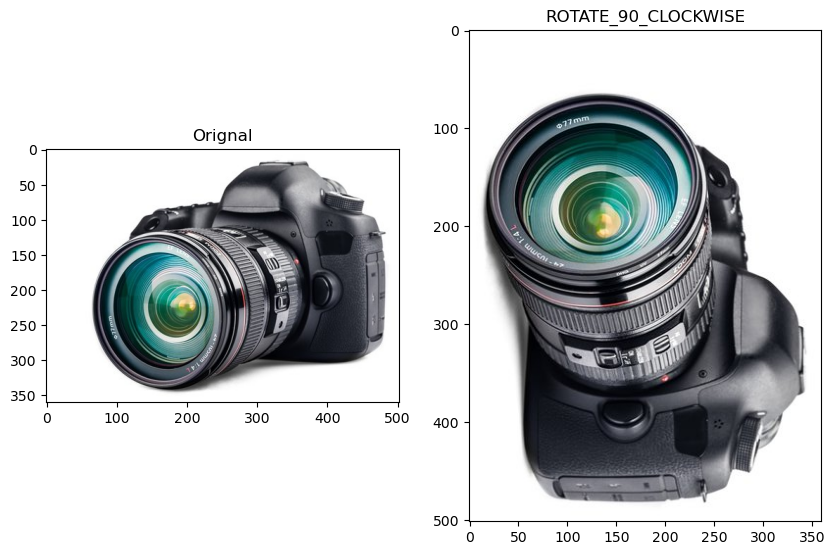

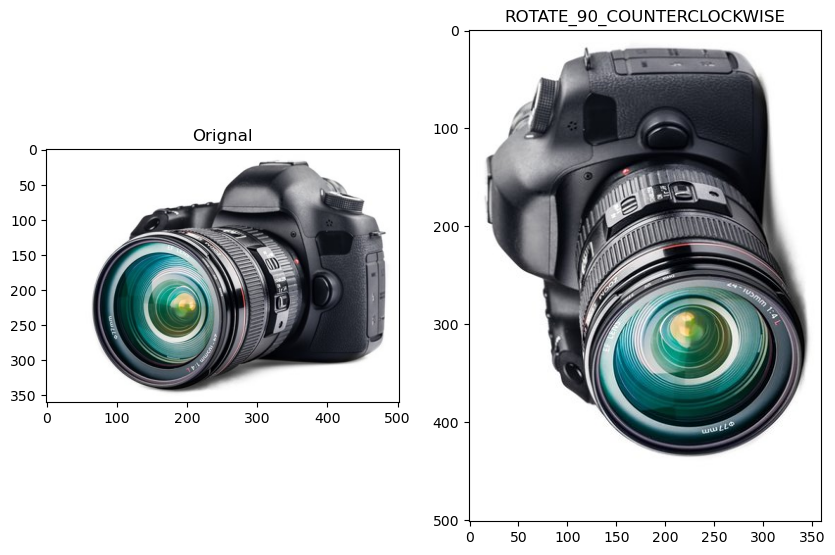

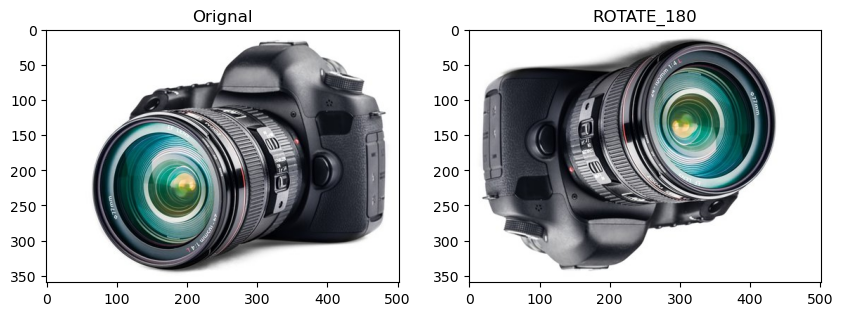

In [127]:
for key, value in flip.items():
    
    plot_image(img, cv2.rotate(img,value), title_2=key)


Image Smoothing:-

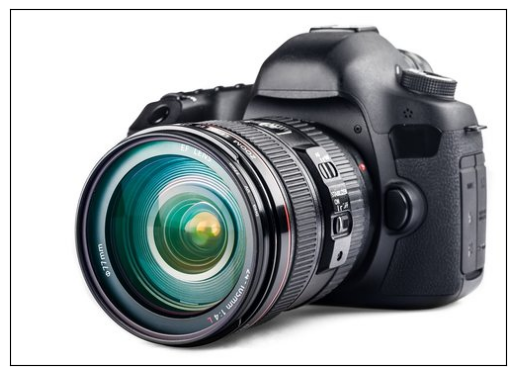

In [128]:
show(img)

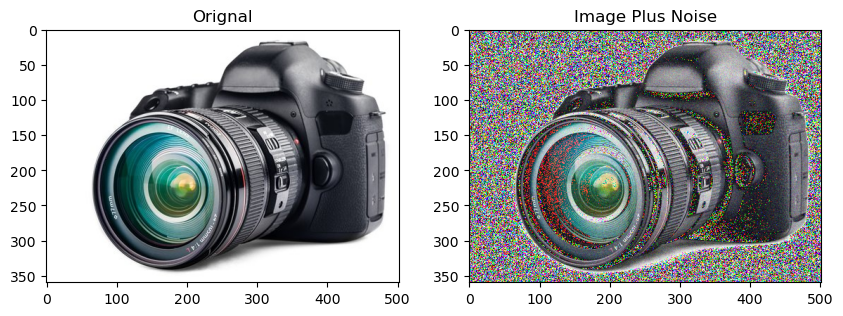

In [129]:
# Get the number of rows and columns in the image
rows, cols,_=  img.shape
noise = np.random.normal(0,15,(rows,cols,3)).astype(np.uint8)

noisy_image = img + noise

plot_image(img, noisy_image, title_1="Orignal",title_2="Image Plus Noise")

In [130]:
def mean_blur(img, kernel=(5, 5)):
    blur = cv2.blur(img, kernel)
    
    return blur

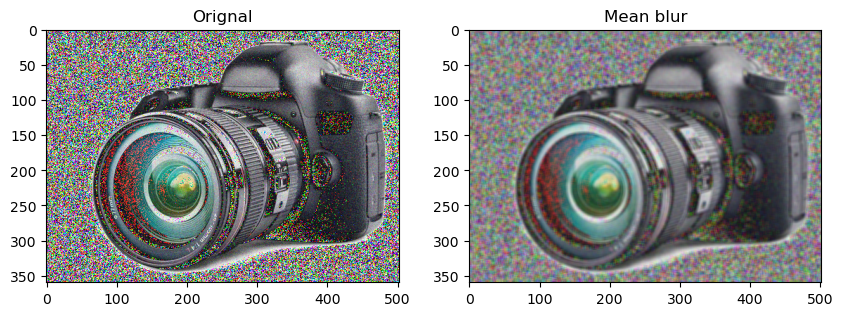

In [131]:
image_mean=mean_blur(noisy_image, (5, 5))

plot_image(noisy_image, image_mean, title_2='Mean blur')

In [132]:
def median_blur(image, ksize = 9):
    return cv2.medianBlur(image, ksize)

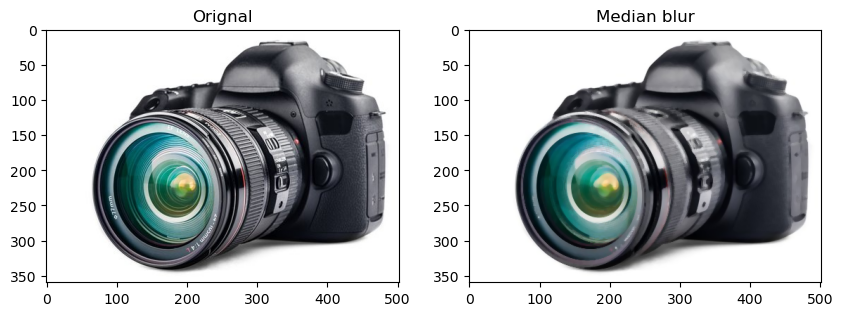

In [133]:
image_med=median_blur(img, 5)

plot_image(img, image_med, title_2='Median blur')

Edge Detection:-

In [134]:
def laplacian(image):
    
    lap=np.uint8(np.absolute(cv2.Laplacian(image,cv2.CV_64F, ksize=1)))
    
    return  lap

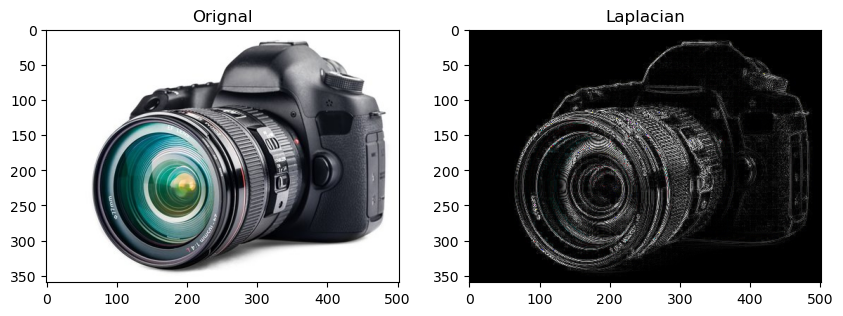

In [135]:
image_lap=laplacian(img)

plot_image(img, image_lap, title_2="Laplacian")

In [136]:
def canny(image, th1=100, th2=200, apertureSize=3):
    return cv2.Canny(image, threshold1=th1, threshold2=th2, apertureSize=apertureSize)

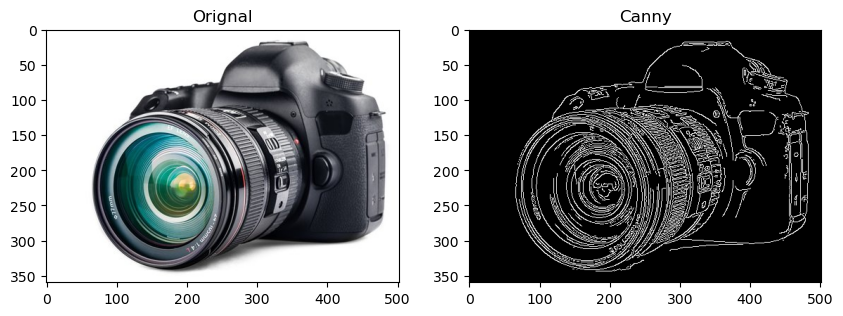

In [137]:
image_canny=canny(img)

plot_image(img, image_canny, title_2="Canny")

In [138]:
def gaussian_blur(img, kernel=(3, 3), sigmaX=0, sigmaY=0):
    return cv2.GaussianBlur(img, kernel, sigmaX, sigmaY)

Transformation

In [139]:
def resize(pic):
    img=pic.copy()
    scale_percent = 500/img.shape[0]
    width = int(img.shape[1] * scale_percent )
    height = int(img.shape[0] * scale_percent )
    dim = (width, height)
  
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    
    return resized

In [140]:
img=resize(img)

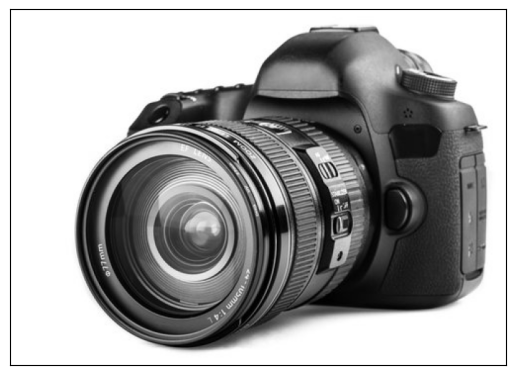

In [141]:
gray = get_grayscale(img)
show(gray)

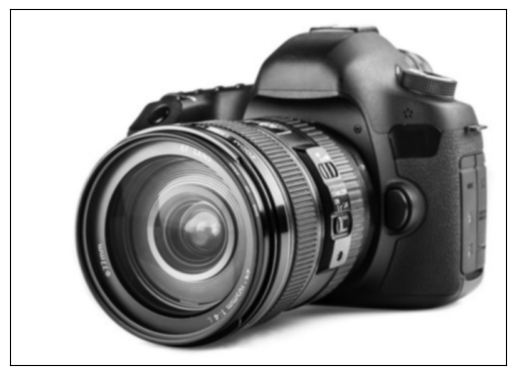

In [142]:
blurred = gaussian_blur(gray, (5, 5))
show(blurred)

In [143]:
def detect_white_region(blurred_image, kernel=(3, 3)):

    squareKernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel)
    dilated = cv2.dilate(blurred, squareKernel)
    
    edge=canny(dilated)
    
    show(edge)
    
    return edge

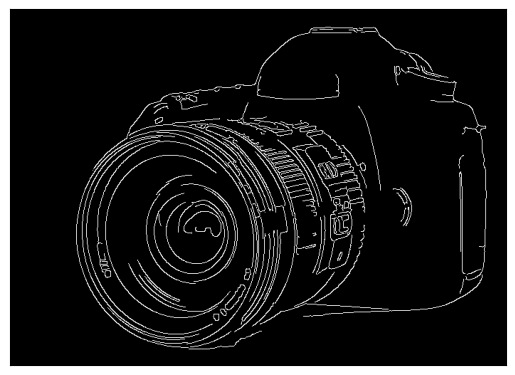

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [144]:
detect_white_region(blurred, (3, 3))

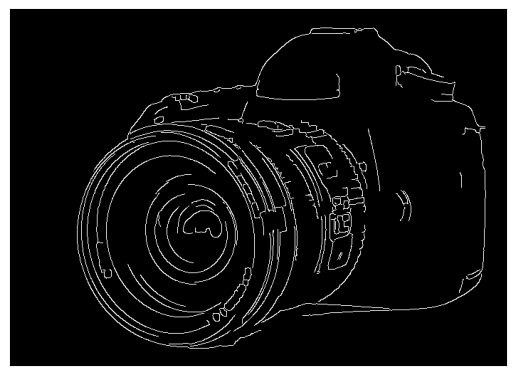

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [145]:
detect_white_region(blurred, (5, 5))

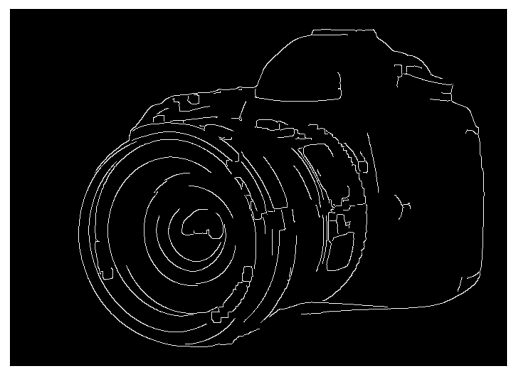

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [146]:
detect_white_region(blurred, (9, 9))

In [154]:
edged = cv2.Canny(blurred, 50, 150)

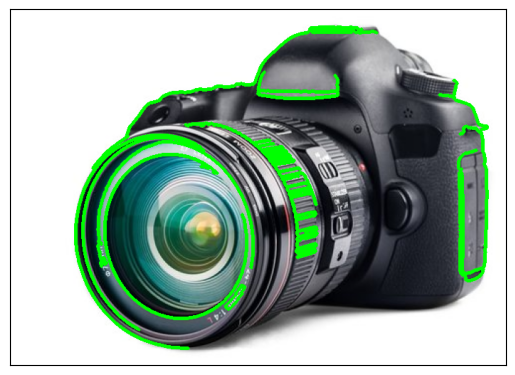

In [157]:
contours, _ = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


largest_contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
image_with_largest_contours = cv2.drawContours(img.copy(), largest_contours, -1, (0, 255, 0), 3)

show(image_with_largest_contours)

**END OF IMAGE PROCESSING**